# Описание задачи классификации
## Описание задачи:
Обучение модели для предсказания первоисточника аниме (`Source`) по имеющимся признакам.

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Загрузка и чтение данных
Загружаем датасет с данными по аниме из сайта myanimelist.net

Выбираем только определённые столбцы:
- `Score` - рейтинг аниме (число от 0 до 10) (float)
- `Genres` - жанры аниме (разделены запятой)
- `Type` - тип аниме (разделены запятой). Возможные значения:
  - TV - сериал
  - Movie - полнометражка
  - OVA - аниме, которое выпускалось на дисках и не показывалось на ТВ
  - Special - бонусные эпизоды аниме
  - ONA - аниме, которое выпускается официально в стриминговых сервисах
  - Music - музыкальные клипы
- `Episodes` - количество эпизодов в аниме
- `Premiered` - месяц и год премьеры аниме
- `Producers` - список продюсеров аниме (разделены запятой)
- `Licensors` - список лицензиаров аниме (разделены запятой)
- `Studios` - список студий аниме (разделены запятой)
- `Source` - источник аниме. Возможные значения:
  - Original
  - Manga
  - Light novel
  - Game
  - Visual novel
  - 4-koma manga
  - Novel
  - Other
  - Picture book
  - Web manga
  - Music
  - Radio
  - Book
  - Mixed media
  - Card game
  - Web novel
- `Duration` - длительность каждого эпизода
- `Rating` - возрастной рейтинг
  - R - 17+ (violence & profanity)
  - PG-13 - Teens 13 or older
  - PG - Children
  - R+ - Mild Nudity
  - G - All Ages
  - Rx - Hentai
- `Favorites` - количество пользователей, которые добавили аниме в избранное (int)
- `Scored by` - количество пользователей, которые поставили оценку аниме (int)
- `Members` - количество пользователей, которые добавили аниме в свой список (int)

In [2]:
anime_data = pd.read_csv("anime-dataset-2023.csv", sep=',', engine="python")
anime_data_columns = ["Score", "Genres", "Type", "Episodes", "Premiered", "Producers", "Licensors", "Studios", "Source", "Duration", "Rating", "Favorites", "Scored By", "Members"]
anime_data = anime_data.loc[:,anime_data_columns]
anime_data_num_columns = ["Scored By", "Members", "Episodes", "Score", "Favorites", "Duration"]
anime_data_str_columns = [e for e in anime_data_columns if e not in anime_data_num_columns]
all_sources = anime_data["Source"].unique()
all_sources = "Source_" + np.delete(all_sources, all_sources == "Unknown")

### Предобрабатываем числовые данные

In [3]:
def parse_duration(d):
    if (d == "Unknown"):
        return "UNKNOWN"
    x = list(filter(str.isnumeric, d.split(' ')))
    if (len(x) == 1 and "hr" in d):
        return str(int(x[0]) * 60)
    if (len(x) == 1):
        return x[0]
    if (len(x) == 2):
        return str(int(x[0]) * 60 + int(x[1]))
    return "UNKNOWN"
anime_data["Duration"] = anime_data["Duration"].apply(parse_duration)

In [4]:
for c in anime_data_num_columns:
    anime_data = anime_data[anime_data[c] != "UNKNOWN"]
    anime_data[c] = anime_data[c].astype(np.float64)

In [5]:
anime_data

,Score,Genres,Type,Episodes,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Favorites,Scored By,Members
0,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,R - 17+ (violence & profanity),78525.0,914193.0,1771505.0
1,8.38,"Action, Sci-Fi",Movie,1.0,UNKNOWN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,115.0,R - 17+ (violence & profanity),1448.0,206248.0,360978.0
2,8.22,"Action, Adventure, Sci-Fi",TV,26.0,spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,PG-13 - Teens 13 or older,15035.0,356739.0,727252.0
3,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,summer 2002,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,PG-13 - Teens 13 or older,613.0,42829.0,111931.0
4,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,fall 2004,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23.0,PG - Children,14.0,6413.0,15001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,5.99,"Action, Comedy, Mystery",ONA,1.0,UNKNOWN,UNKNOWN,UNKNOWN,"HMCH, Gravity Well",Game,3.0,PG-13 - Teens 13 or older,1.0,129.0,518.0
24635,6.45,UNKNOWN,Music,1.0,UNKNOWN,MAZRI,UNKNOWN,UNKNOWN,Original,4.0,PG-13 - Teens 13 or older,1.0,152.0,333.0
24729,6.07,UNKNOWN,Special,1.0,UNKNOWN,UNKNOWN,UNKNOWN,CygamesPictures,Web manga,23.0,PG-13 - Teens 13 or older,1.0,114.0,482.0
24831,6.29,"Action, Adventure, Comedy, Fantasy",Special,1.0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Manga,24.0,PG-13 - Teens 13 or older,1.0,320.0,593.0


### Вычисление основных характеристик

In [6]:
anime_data.describe()

,Score,Episodes,Duration,Favorites,Scored By,Members
count,15592.000000,15592.000000,15592.000000,15592.000000,1.559200e+04,1.559200e+04
mean,6.379840,11.313045,25.423807,673.333504,3.006184e+04,5.845250e+04
std,0.929593,48.336152,25.061304,5249.507955,1.168915e+05,1.941903e+05
min,1.850000,1.000000,1.000000,0.000000,1.000000e+02,1.800000e+02
25%,5.730000,1.000000,6.000000,1.000000,3.840000e+02,1.166000e+03
50%,6.390000,2.000000,23.000000,7.000000,1.780000e+03,4.938500e+03
75%,7.060000,12.000000,27.000000,60.250000,1.100800e+04,2.714500e+04
max,9.100000,3057.000000,168.000000,217606.000000,2.660903e+06,3.744541e+06


### Визуализация данных

array([[<Axes: xlabel='Score', ylabel='Score'>,
        <Axes: xlabel='Episodes', ylabel='Score'>,
        <Axes: xlabel='Duration', ylabel='Score'>,
        <Axes: xlabel='Favorites', ylabel='Score'>,
        <Axes: xlabel='Scored By', ylabel='Score'>,
        <Axes: xlabel='Members', ylabel='Score'>],
       [<Axes: xlabel='Score', ylabel='Episodes'>,
        <Axes: xlabel='Episodes', ylabel='Episodes'>,
        <Axes: xlabel='Duration', ylabel='Episodes'>,
        <Axes: xlabel='Favorites', ylabel='Episodes'>,
        <Axes: xlabel='Scored By', ylabel='Episodes'>,
        <Axes: xlabel='Members', ylabel='Episodes'>],
       [<Axes: xlabel='Score', ylabel='Duration'>,
        <Axes: xlabel='Episodes', ylabel='Duration'>,
        <Axes: xlabel='Duration', ylabel='Duration'>,
        <Axes: xlabel='Favorites', ylabel='Duration'>,
        <Axes: xlabel='Scored By', ylabel='Duration'>,
        <Axes: xlabel='Members', ylabel='Duration'>],
       [<Axes: xlabel='Score', ylabel='Favorites'

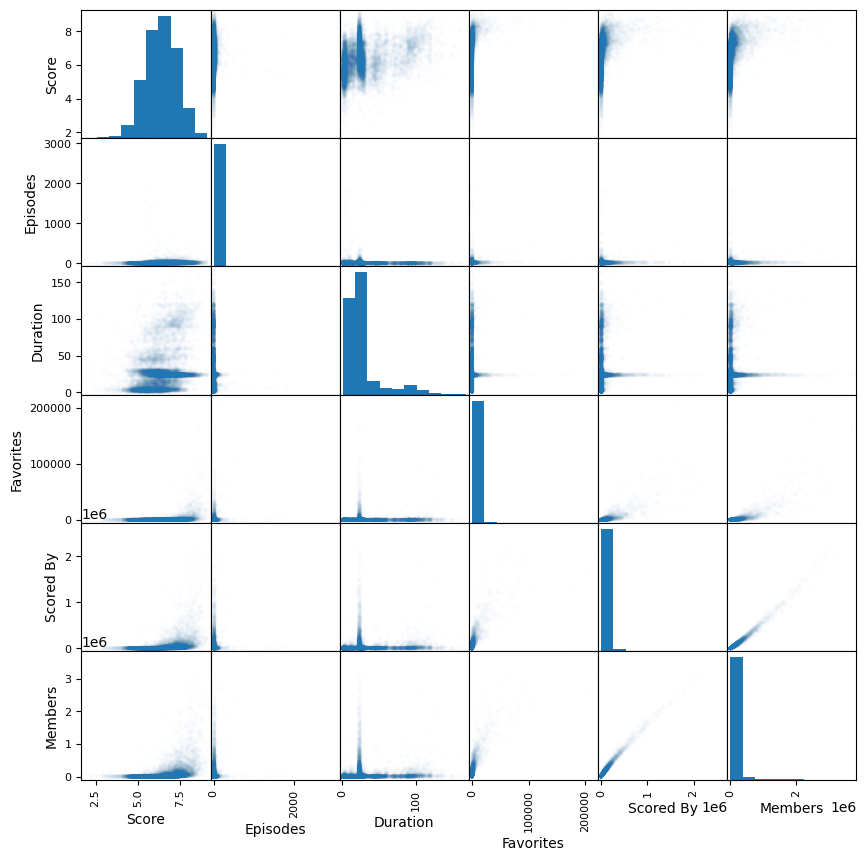

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(anime_data, alpha = .01, figsize = (10, 10))

### Обрабатываем категориальные признаки с помощью векторизации и избавляемся от пропущенных значений

In [8]:
for e in ("Genres", "Producers", "Licensors", "Studios"):
    genres_column = anime_data[e]
    tmp = genres_column.str.get_dummies(sep=", ")
    tmp = tmp.drop(columns=["UNKNOWN"], errors="ignore")
    tmp = tmp.drop(columns=["Unknown"], errors="ignore")
    tmp = tmp.add_prefix(e + '_')
    anime_data = pd.concat([anime_data.drop(columns=[e]), tmp], axis=1)
print(anime_data.columns)

Index(['Score', 'Type', 'Episodes', 'Premiered', 'Source', 'Duration',
       'Rating', 'Favorites', 'Scored By', 'Members',
       ...
       'Studios_ixtl', 'Studios_l-a-unch・BOX', 'Studios_monofilmo',
       'Studios_pH Studio', 'Studios_production doA', 'Studios_studio MOTHER',
       'Studios_team Yamahitsuji', 'Studios_teamKG', 'Studios_ufotable',
       'Studios_yell'],
      dtype='object', length=2460)


In [9]:
anime_data

,Score,Type,Episodes,Premiered,Source,Duration,Rating,Favorites,Scored By,Members,...,Studios_ixtl,Studios_l-a-unch・BOX,Studios_monofilmo,Studios_pH Studio,Studios_production doA,Studios_studio MOTHER,Studios_team Yamahitsuji,Studios_teamKG,Studios_ufotable,Studios_yell
0,8.75,TV,26.0,spring 1998,Original,24.0,R - 17+ (violence & profanity),78525.0,914193.0,1771505.0,...,0,0,0,0,0,0,0,0,0,0
1,8.38,Movie,1.0,UNKNOWN,Original,115.0,R - 17+ (violence & profanity),1448.0,206248.0,360978.0,...,0,0,0,0,0,0,0,0,0,0
2,8.22,TV,26.0,spring 1998,Manga,24.0,PG-13 - Teens 13 or older,15035.0,356739.0,727252.0,...,0,0,0,0,0,0,0,0,0,0
3,7.25,TV,26.0,summer 2002,Original,25.0,PG-13 - Teens 13 or older,613.0,42829.0,111931.0,...,0,0,0,0,0,0,0,0,0,0
4,6.94,TV,52.0,fall 2004,Manga,23.0,PG - Children,14.0,6413.0,15001.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,5.99,ONA,1.0,UNKNOWN,Game,3.0,PG-13 - Teens 13 or older,1.0,129.0,518.0,...,0,0,0,0,0,0,0,0,0,0
24635,6.45,Music,1.0,UNKNOWN,Original,4.0,PG-13 - Teens 13 or older,1.0,152.0,333.0,...,0,0,0,0,0,0,0,0,0,0
24729,6.07,Special,1.0,UNKNOWN,Web manga,23.0,PG-13 - Teens 13 or older,1.0,114.0,482.0,...,0,0,0,0,0,0,0,0,0,0
24831,6.29,Special,1.0,UNKNOWN,Manga,24.0,PG-13 - Teens 13 or older,1.0,320.0,593.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for e in ("Type", "Premiered", "Source", "Rating"):
    tmp = pd.get_dummies(anime_data[e], dtype=np.int64)
    tmp = tmp.drop(columns=["UNKNOWN"], errors="ignore")
    tmp = tmp.drop(columns=["Unknown"], errors="ignore")
    tmp = tmp.add_prefix(e + '_')
    anime_data = pd.concat([anime_data.drop(columns=[e]), tmp], axis=1)

In [11]:
anime_data

,Score,Episodes,Duration,Favorites,Scored By,Members,Genres_Action,Genres_Adventure,Genres_Avant Garde,Genres_Award Winning,...,Source_Radio,Source_Visual novel,Source_Web manga,Source_Web novel,Rating_G - All Ages,Rating_PG - Children,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Rx - Hentai
0,8.75,26.0,24.0,78525.0,914193.0,1771505.0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,8.38,1.0,115.0,1448.0,206248.0,360978.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,8.22,26.0,24.0,15035.0,356739.0,727252.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.25,26.0,25.0,613.0,42829.0,111931.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6.94,52.0,23.0,14.0,6413.0,15001.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,5.99,1.0,3.0,1.0,129.0,518.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24635,6.45,1.0,4.0,1.0,152.0,333.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24729,6.07,1.0,23.0,1.0,114.0,482.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
24831,6.29,1.0,24.0,1.0,320.0,593.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Проводим нормализацию количественных признаков

In [12]:
anime_data_num_data = anime_data[anime_data_num_columns]
anime_data_num_data.describe()

,Scored By,Members,Episodes,Score,Favorites,Duration
count,1.559200e+04,1.559200e+04,15592.000000,15592.000000,15592.000000,15592.000000
mean,3.006184e+04,5.845250e+04,11.313045,6.379840,673.333504,25.423807
std,1.168915e+05,1.941903e+05,48.336152,0.929593,5249.507955,25.061304
min,1.000000e+02,1.800000e+02,1.000000,1.850000,0.000000,1.000000
25%,3.840000e+02,1.166000e+03,1.000000,5.730000,1.000000,6.000000
50%,1.780000e+03,4.938500e+03,2.000000,6.390000,7.000000,23.000000
75%,1.100800e+04,2.714500e+04,12.000000,7.060000,60.250000,27.000000
max,2.660903e+06,3.744541e+06,3057.000000,9.100000,217606.000000,168.000000


In [13]:
anime_data_num_data = (anime_data_num_data - anime_data_num_data.mean(axis = 0))/anime_data_num_data.std(axis = 0)
anime_data_num_data.describe()

,Scored By,Members,Episodes,Score,Favorites,Duration
count,1.559200e+04,1.559200e+04,1.559200e+04,1.559200e+04,1.559200e+04,1.559200e+04
mean,-7.291357e-18,5.468518e-18,-1.458271e-17,-5.833086e-17,9.114196e-19,1.458271e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.563218e-01,-3.000794e-01,-2.133609e-01,-4.872930e+00,-1.282660e-01,-9.745625e-01
25%,-2.538922e-01,-2.950019e-01,-2.133609e-01,-6.990585e-01,-1.280755e-01,-7.750517e-01
50%,-2.419495e-01,-2.755751e-01,-1.926725e-01,1.092988e-02,-1.269326e-01,-9.671512e-02
75%,-1.630045e-01,-1.612208e-01,1.421203e-02,7.316757e-01,-1.167888e-01,6.289349e-02
max,2.250669e+01,1.898184e+01,6.301054e+01,2.926185e+00,4.132438e+01,5.689097e+00


In [14]:
anime_data_num_data

,Scored By,Members,Episodes,Score,Favorites,Duration
0,7.563690,8.821516,0.303850,2.549676,14.830279,-0.056813
1,1.507262,1.557882,-0.213361,2.151652,0.147569,3.574283
2,2.794704,3.444042,0.303850,1.979534,2.735812,-0.056813
3,0.109222,0.275392,0.303850,0.936066,-0.011493,-0.016911
4,-0.202314,-0.223757,0.841750,0.602587,-0.125599,-0.096715
...,...,...,...,...,...,...
24590,-0.256074,-0.298339,-0.213361,-0.419366,-0.128076,-0.894758
24635,-0.255877,-0.299292,-0.213361,0.075474,-0.128076,-0.854856
24729,-0.256202,-0.298524,-0.213361,-0.333307,-0.128076,-0.096715
24831,-0.254440,-0.297953,-0.213361,-0.096644,-0.128076,-0.056813


In [15]:
anime_data = pd.concat([anime_data.drop(columns=anime_data_num_columns), anime_data_num_data], axis=1)
anime_data

,Genres_Action,Genres_Adventure,Genres_Avant Garde,Genres_Award Winning,Genres_Boys Love,Genres_Comedy,Genres_Drama,Genres_Ecchi,Genres_Erotica,Genres_Fantasy,...,Rating_PG-13 - Teens 13 or older,Rating_R - 17+ (violence & profanity),Rating_R+ - Mild Nudity,Rating_Rx - Hentai,Scored By,Members,Episodes,Score,Favorites,Duration
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,7.563690,8.821516,0.303850,2.549676,14.830279,-0.056813
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1.507262,1.557882,-0.213361,2.151652,0.147569,3.574283
2,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2.794704,3.444042,0.303850,1.979534,2.735812,-0.056813
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0.109222,0.275392,0.303850,0.936066,-0.011493,-0.016911
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,-0.202314,-0.223757,0.841750,0.602587,-0.125599,-0.096715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,-0.256074,-0.298339,-0.213361,-0.419366,-0.128076,-0.894758
24635,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,-0.255877,-0.299292,-0.213361,0.075474,-0.128076,-0.854856
24729,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,-0.256202,-0.298524,-0.213361,-0.333307,-0.128076,-0.096715
24831,1,1,0,0,0,1,0,0,0,1,...,1,0,0,0,-0.254440,-0.297953,-0.213361,-0.096644,-0.128076,-0.056813


### X и y

In [16]:
X = anime_data.drop(columns=all_sources)
y = anime_data[all_sources].to_numpy()
feature_names = X.columns
X = X.to_numpy()
N, d = X.shape

### Разбиваем данные на обучающие и тестовые выборки

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

10914 4678


### Используем метод RF - Random Forest (случайный лес) и вычисляем ошибки на тестовой и обучающей выборках
Используется RF потому, что есть большое количество несбалансированных классов и категориальных признаков

In [18]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.04034843950406156


### Значимость признаков

In [19]:
np.sum(rf.feature_importances_)

np.float64(1.0)

In [20]:
importances = rf.feature_importances_
sums = {}
indexes_to_delete = []

for f in range(d):
    tmp = feature_names[f].find('_')
    if not feature_names[f][:tmp] in anime_data_str_columns:
        continue
    tmp = feature_names[f][:tmp]
    if (not tmp in sums.keys()):
        sums[tmp] = 0
    sums[tmp] += importances[f]
    indexes_to_delete.append(f)

importances = list(np.delete(importances, indexes_to_delete))
feature_names = list(np.delete(feature_names, indexes_to_delete))

importances.extend(sums.values())
feature_names.extend(sums.keys())

importances = np.array(importances, dtype=np.float64)
feature_names = np.array(feature_names)

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

importances_table = []
for f in range(len(feature_names)):
    importances_table.append((feature_names[indices[f]], importances[indices[f]]))
importances_table = pd.DataFrame(importances_table, columns=("Признак", "Значимость"))
importances_table
#for f in range(len(feature_names)):
#    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:


,Признак,Значимость
0,Producers,0.204867
1,Studios,0.166660
2,Genres,0.126378
3,Score,0.068016
4,Members,0.067460
5,Scored By,0.065259
6,Duration,0.055886
7,Favorites,0.048174
8,Type,0.044673
9,Rating,0.044545


(-1.0, 13.0)

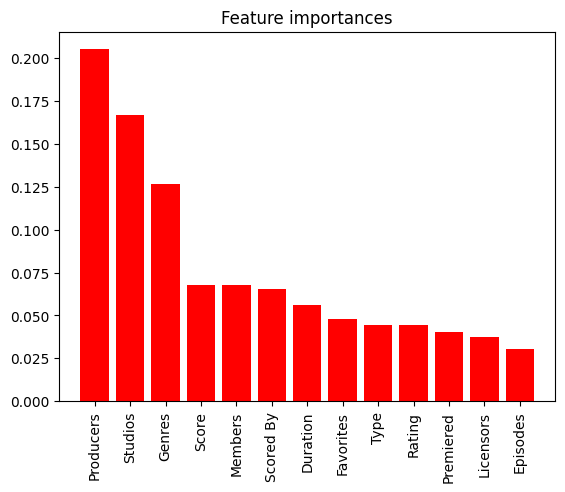

In [21]:
d_first = min(len(feature_names), 20)
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

## Вывод
- Модель имеет высокую точность на тестовой выборке (96%).
- Наиболее влиятельные признаки - `Producers`, `Studios` и `Genres`.

# Решим задачу кластеризации

Задача обучения без учителя кластеризация — это разбиение объектов на группы (кластеры), так, чтобы в одном кластере оказались "похожие" друг на друга объекты, а в разных кластерах — "мало похожие".

Рассмотрим следующие методы:
- K-means (*метод центров тяжессти* или *средних*)
- DBSCAN (Density-based spatial clustering of applications with noise)
- MeanShift (сдвиг среднего значения)

In [22]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth

# X и y
X = anime_data.drop(columns=all_sources).to_numpy()
y = anime_data[all_sources].to_numpy()
N, d = X.shape

bandwidth = estimate_bandwidth(X, quantile=0.3, random_state=42)

# KMeans
kmeans = KMeans(y.shape[1], random_state=42)

# DBSCAN
dbscan = DBSCAN(eps=0.5)

# MeanShift
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)

algs = (
    ("KMeans", kmeans),
    ("DBSCAN", dbscan),
    ("MeanShift", meanshift),
)

alg_labels = []

for alg_name, alg in algs:
    alg_label = alg.fit_predict(X)
    alg_labels.append(alg.fit_predict(X))



### Сравниваем результат кластеризации с истинными метками
Рассмотрим следующие метрики:
- V-Measure
- Adjusted Rand index
- Mutual info
- Normalized mutual info
- Adjusted mutual info

In [23]:
from sklearn.metrics import v_measure_score, adjusted_rand_score, mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

# Преобразуем векторизованный категориальный признак в числовой
y_num = np.argmax(y, axis=1)

all_metrics = (
    ("V-measure", v_measure_score),
    ("Adjusted Rand Index", adjusted_rand_score),
    ("Mutual Info", mutual_info_score),
    ("Normalized Mutual Info", normalized_mutual_info_score),
    ("Adjusted Mutual Info", adjusted_mutual_info_score),
)

# Результаты метрик
metrics_res = []

for i in range(len(algs)):
    alg_name = algs[i][0]
    alg = algs[i][1]
    alg_label = alg_labels[i]
    for metric_name, metric in all_metrics:
        m = metric(y_num, alg_label)
        metrics_res.append((alg_name, metric_name, m))
        #print(f"{alg_name} {metric_name} {m}")

metrics_res = pd.DataFrame(metrics_res, columns=("Метод", "Метрика", "Значение"))
metrics_res

,Метод,Метрика,Значение
0,KMeans,V-measure,0.120748
1,KMeans,Adjusted Rand Index,0.044548
2,KMeans,Mutual Info,0.250598
3,KMeans,Normalized Mutual Info,0.120748
4,KMeans,Adjusted Mutual Info,0.117847
5,DBSCAN,V-measure,0.106433
6,DBSCAN,Adjusted Rand Index,-0.019661
7,DBSCAN,Mutual Info,0.145973
8,DBSCAN,Normalized Mutual Info,0.106433
9,DBSCAN,Adjusted Mutual Info,0.081395


## Вывод
В данном датасете методы кластеризации показали низкие значения метрик (ближе к 1 — лучше). Это означает, что данные сложно кластеризовать.

То есть стоит использовать обучение с учителем.